<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/AMPL_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="150px" src="https://avatars1.githubusercontent.com/u/56178629?s=400&u=8f149c29954fc5f92773f0c89ff52e7b39d13a3b&v=4" align="left" hspace="10px" vspace="0px"></p>

<h1>AMPL Using COLAB</h1>


The ATOM Modeling PipeLine (AMPL; https://github.com/ATOMconsortium/AMPL) is an open-source, modular, extensible software pipeline for building and sharing models to advance in silico drug discovery.

This is an atttempt to run AMPL in Google COLAB

**Warning: This is an experimental notebook**



---



## COLAB *environment*

* **Main requirement: GMAIL account**
* COLAB is a VM on the cloud
* You get 12 hours for one session. But, if a session is idle for 20 minutes, it can disconnect. 
* Hardware
  - Navigate to Runtime -> Change Runtime to select TPU or GPU 
  - GPU: Nvidia K80s, T4s, P4s and P100s (no option to request a specific GPU in the free version. Check COLAB Pro)
  - TPU: Tensor Processer Unit

Make sure to turn on GPU/TPU as the runtype before begin running the notebook 

**Runtime environments**

CPU vs TPU vs GPU

https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/GPUvsTPU.ipynb#scrollTo=5moeHHv4shGw

**System settings**



*   Ubuntu 18.94.3 LTS 
*   Single core, Intel Xeon CPU 2.3 GHz
*   Memory: 13.6 GB 
*   Accelerator: TPU and GPU support 



In [1]:
! cat /etc/issue

!cat /proc/cpu* | grep proc*
!cat /proc/cpu* | grep 'core id'

!cat /proc/version   
!cat /proc/cpuinfo  # Intel Xeon CPU 2.3 GHz, 1 CPU core
!cat /proc/meminfo  # 13 GB 

Ubuntu 18.04.5 LTS \n \l

processor	: 0
processor	: 1
core id		: 0
core id		: 0
Linux version 4.19.112+ (builder@a12462ca91c8) (Chromium OS 10.0_pre377782_p20200113-r10 clang version 10.0.0 (/var/cache/chromeos-cache/distfiles/host/egit-src/llvm-project 4e8231b5cf0f5f62c7a51a857e29f5be5cb55734)) #1 SMP Thu Jul 23 08:00:38 PDT 2020
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetc

## COLAB CODE snippets

Code snippet templates are available from the left-hand side menu ( look for < > ) 
Here are a couple of sample visualization code chunks using Altair, https://altair-viz.github.io/ 

In [2]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)

In [3]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

## Exploring COLAB file system

**When you being, you will land on `/contents` folder**

In [4]:
!pwd

/content


In [5]:
# COLAB version of Python 
!python --version

# The version shown above is COLAB version but AMPL is at 3.6.6

Python 3.6.9


## Clone the AMPL software
  * You are in /content directory

In [6]:
!git clone https://github.com/ATOMconsortium/AMPL.git

Cloning into 'AMPL'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (375/375), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 1216 (delta 208), reused 320 (delta 173), pack-reused 841
Receiving objects: 100% (1216/1216), 9.51 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (632/632), done.


**Conda, Python particulars **

Note that COLAB doesnt come with CONDA. You need to install Conda before installing AMPL

In [7]:
!conda --version

/bin/bash: conda: command not found


## Download Miniconda and install it in default location
  * Conda supported version is tied to Python
  * Supported version is 3.6.9 as of Aug 27, 2020

In [8]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
# ~ 15 seconds
time bash Miniconda3-latest-Linux-x86_64.sh -b

PREFIX=/root/miniconda3
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /root/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - ca-certificates==2020.1.1=0
    - certifi==2020.4.5.1=py38_0
    - cffi==1.14.0=py38he30daa8_1
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.1=py38h7b6447c_0
    - conda==4.8.3=py38_0
    - cryptography==2.9.2=py38h1ba5d50_0
    - idna==2.9=py_1
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit==3.1.20181209=hc058e9b_0
    - libffi==3.3=he6710b0_1
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1g=h7b6447c_0
    - pip==20.0.2=py38_3
    - pycosat==0.6.3=py38h7b6447c_1
    - pycparser==2.20=py_0
    - pyopenssl==19.1.0=py38_0
    - pysocks==1.7.1=py38_0
    - python==3.8.3=hcff3b4d_0
    - readline==8.0=h7b6447c_0
    - requests==2.23.0=py38_0
    - ruamel_yaml==0.15.87=py38h7b6447c_0


--2020-09-16 15:59:18--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-09-16 15:59:18--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 79.0M 1s
    50K .......... .......... .......... .......... ..........

## Check the miniconda version and install the AMPL compatible Conda/Python

In [9]:
!/root/miniconda3/bin/conda -V

conda 4.8.3


In [10]:
!/root/miniconda3/bin/conda install conda=4.6.12 python=3.6.6 -y

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/miniconda3

  added / updated specs:
    - conda=4.6.12
    - python=3.6.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asn1crypto-1.4.0           |             py_0          80 KB
    brotlipy-0.7.0             |py36h7b6447c_1000         323 KB
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    cffi-1.14.0                |   py36h2e261b9_0         223 KB
    chardet-3.0.4              |       

In [11]:
!/root/miniconda3/bin/conda --version

# Note the Python version has changed
!python --version

conda 4.6.12
Python 3.6.9


## Mount Your Google drive 

* Please note that when you run the following code-chunk, you will be asked to click a link, and authenticate your linked email account. After that an authentication code will be displayed, copy and paste it in the newly opened window. After the authetication your drive will be mounted and all your drive files will then be accessible.

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

## Begin AMPL installation 

~ 5 to 7 minutes
```
real	8m51.271s
user	8m2.094s
sys	0m27.282s
```

In [13]:
%cd /content/AMPL/conda
!time /root/miniconda3/bin/conda install --file conda_package_list.txt -y
%cd /content

/content/AMPL/conda

conda-env-2.6.0      | : 100% 1.0/1 [00:00<00:00,  7.36it/s] 
libtool-2.4.6        | : 100% 1.0/1 [00:00<00:00,  3.83it/s]               
blas-1.0             | : 100% 1.0/1 [00:00<00:00, 35.71it/s]
ca-certificates-2019 | : 100% 1.0/1 [00:00<00:00, 19.96it/s]
cudatoolkit-9.0      | : 100% 1.0/1 [01:14<00:00, 74.73s/it]                
fftw3f-3.3.4         | : 100% 1.0/1 [00:00<00:00,  1.25it/s]               
intel-openmp-2018.0. | : 100% 1.0/1 [00:00<00:00,  9.92it/s]
jpeg-9b              | : 100% 1.0/1 [00:00<00:00,  8.88it/s]
libgcc-ng-8.2.0      | : 100% 1.0/1 [00:02<00:00,  2.07s/it]               
libgfortran-ng-7.2.0 | : 100% 1.0/1 [00:00<00:00,  2.27it/s]               
libstdcxx-ng-7.2.0   | : 100% 1.0/1 [00:00<00:00,  1.39it/s]              
lzo-2.10             | : 100% 1.0/1 [00:00<00:00,  8.26it/s]
pixman-0.34.0        | : 100% 1.0/1 [00:00<00:00,  9.56it/s]
tk-8.6.7             | : 100% 1.0/1 [00:00<00:00,  1.02it/s]               
yaml-0.1.7         

## Activate `atomsci` env and pip install `requirements.txt` file 
Expected time

```
real	0m38.974s
user	0m30.714s
sys	0m5.507s
```

In [14]:
%cd /content/AMPL/conda
!/root/miniconda3/bin/pip install -r pip_requirements.txt
%cd /content

/content/AMPL/conda
    100% |████████████████████████████████| 102kB 5.4MB/s 
    100% |████████████████████████████████| 61kB 20.4MB/s 
    100% |████████████████████████████████| 317kB 12.7MB/s 
    100% |████████████████████████████████| 61kB 24.3MB/s 
    100% |████████████████████████████████| 61kB 18.0MB/s 
    100% |████████████████████████████████| 34.5MB 1.8MB/s 
    100% |████████████████████████████████| 71kB 33.3MB/s 
    100% |████████████████████████████████| 133kB 35.5MB/s 
    100% |████████████████████████████████| 256kB 31.7MB/s 
    100% |████████████████████████████████| 17.3MB 3.5MB/s 
    100% |████████████████████████████████| 204kB 41.3MB/s 
    100% |████████████████████████████████| 12.5MB 1.2MB/s 
    100% |████████████████████████████████| 213.4MB 163kB/s 
    100% |████████████████████████████████| 81kB 34.6MB/s 
    100% |████████████████████████████████| 40kB 24.4MB/s 
  Running setup.py bdist_wheel for anyconfig ... done
  Stored in directory: /root/.ca

In [15]:
%cd /content/AMPL
!./build.sh
!./install.sh system
%cd /content

/content/AMPL
running build
running build_py
creating /content/AMPL.build/ampl/lib
creating /content/AMPL.build/ampl/lib/atomsci
copying atomsci/__init__.py -> /content/AMPL.build/ampl/lib/atomsci
creating /content/AMPL.build/ampl/lib/atomsci/ddm
copying atomsci/ddm/__init__.py -> /content/AMPL.build/ampl/lib/atomsci/ddm
creating /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/pubchem_utils.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/data_curation_functions.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/struct_utils.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/genTestset.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/open-docs.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/__init__.py -> /content/AMPL.build/ampl/lib/atomsci/ddm/utils
copying atomsci/ddm/utils/curate_data.py -> /content/AMPL.build/am

## Build/Install AMPL

In [16]:
# There is a problem with the UMAP package, so temporarily remove umap import
%%bash
cat << EOF > ampl.patch
--- transformations.py  2020-09-14 17:08:22.225747322 -0700
+++ transformations_patched.py  2020-09-14 17:08:07.869651225 -0700
@@ -9,7 +9,7 @@

 import numpy as np
 import pandas as pd
-import umap
+# import umap

 import deepchem as dc
 from deepchem.trans.transformers import Transformer, NormalizationTransformer
EOF

patch -N /content/AMPL/atomsci/ddm/pipeline/transformations.py ampl.patch

patching file /content/AMPL/atomsci/ddm/pipeline/transformations.py


In [17]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [18]:
sys.path.insert(1, '/root/miniconda3/lib/python3.6/site-packages')
sys.path

['',
 '/root/miniconda3/lib/python3.6/site-packages',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [19]:
if 'cffi' in sys.modules:
  del sys.modules['cffi']

### Create some useful directories

* `/usr/local/data`

In [20]:
%mkdir -p /usr/local/data

## Run some AMPL code

**Import libraries**

In [21]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL dependency modules.
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import os
import requests
import sys

import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp

/root/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/root/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
working_dir = '/usr/local/data'

**Download Delaney dataset**

In [23]:
dataset_file = os.path.join(working_dir, 'delaney-processed.csv')
if (not os.path.isfile(dataset_file)):
    r = requests.get('http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/delaney-processed.csv', verify=True)
    with open(dataset_file, 'wb') as f:
        f.write(r.content)

**Load the dataset**

In [24]:

raw_df = pd.read_csv(dataset_file)

# Generate SMILES, InChI keys for dataset with curation and structure modules.
# RDkit modules are used to process the SMILES strings
raw_df['rdkit_smiles'] = raw_df['smiles'].apply(curate_data.base_smiles_from_smiles)
raw_df['inchi_key'] = raw_df['smiles'].apply(struct_utils.smiles_to_inchi_key)

data = raw_df
data['compound_id'] = data['inchi_key']

**Data curation**

In [25]:
# column: Response values column
column = 'measured log solubility in mols per litre'

# tolerance: Percentage of individual respsonse values allowed to different from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100000

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, list_bad_duplicates, data, max_std,
                                                       compound_id=compound_id, smiles_col=smiles_col)
curated_file = os.path.join(working_dir, 'delaney_curated.csv')
curated_df.to_csv(curated_file, index=False)


featurizer = 'ecfp'
model_type = 'RF'
response_cols = ['VALUE_NUM_mean']


Bad duplicates removed from dataset
Dataframe size (1128, 17)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, measured log solubility in mols per litre, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (1117, 17)
New column created with averaged values:  VALUE_NUM_mean


**Set the parameters and create the model**

2020-09-16 16:08:19,889 Splitting data by scaffold


number of features: 1024


2020-09-16 16:08:20,494 Dataset split table saved to /usr/local/data/delaney_curated_train_valid_test_scaffold_ffac84be-bfe7-4dc8-a3b5-e43f7a2fb30f.csv


n_cnt [1117.]
y_means [-3.05005819]
y_stds [2.09451877]
TIMING: dataset construction took 0.043 s
Loading dataset from disk.
TIMING: dataset construction took 0.009 s
Loading dataset from disk.
TIMING: dataset construction took 0.009 s
Loading dataset from disk.


2020-09-16 16:08:24,142 Wrote model metadata to file /usr/local/data/delaney_curated/RF_ecfp_scaffold_regression/8e81c98e-aa45-454e-bee2-4dcc9b60ad96/model_metadata.json
2020-09-16 16:08:24,510 Wrote model metrics to file /usr/local/data/delaney_curated/RF_ecfp_scaffold_regression/8e81c98e-aa45-454e-bee2-4dcc9b60ad96/model_metrics.json


Wrote model tarball to /usr/local/data/delaney_curated_model_8e81c98e-aa45-454e-bee2-4dcc9b60ad96.tar.gz


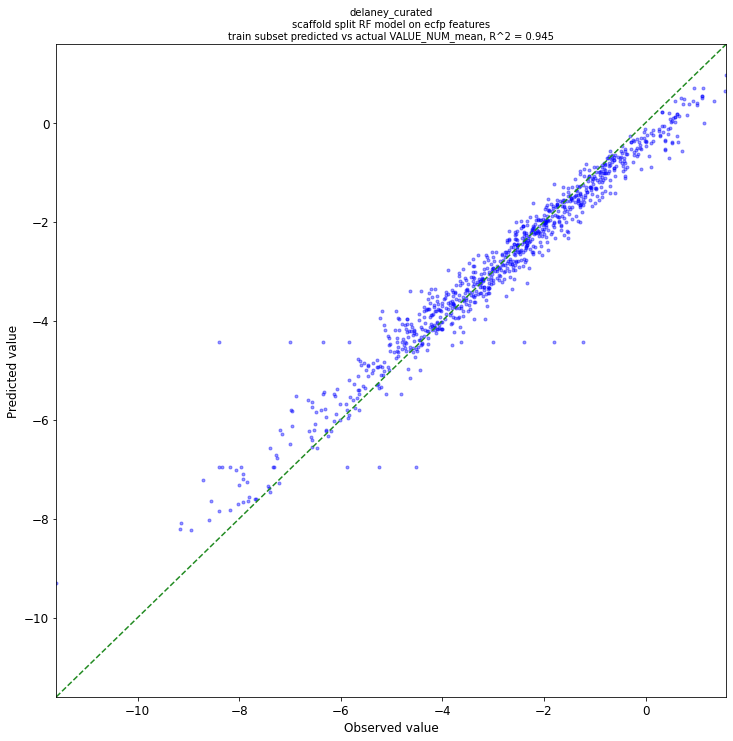

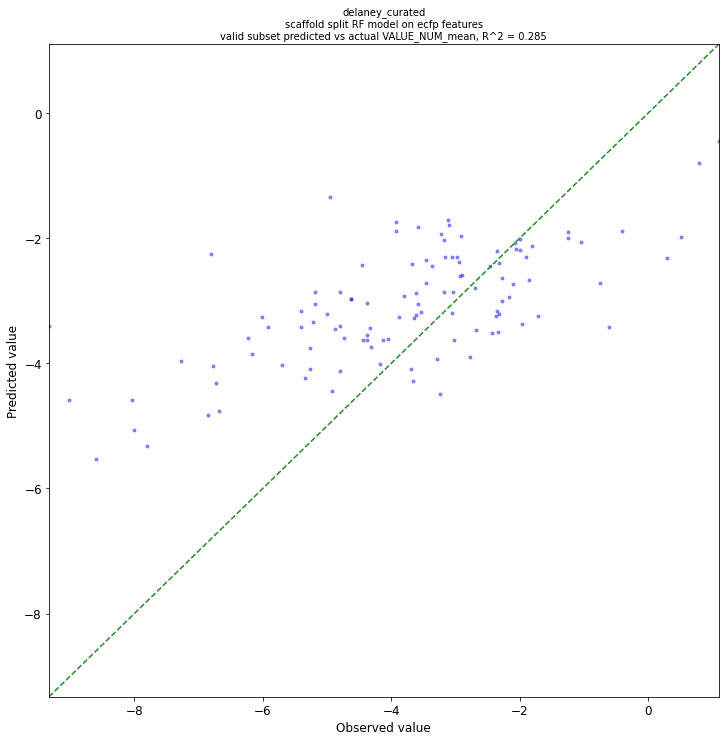

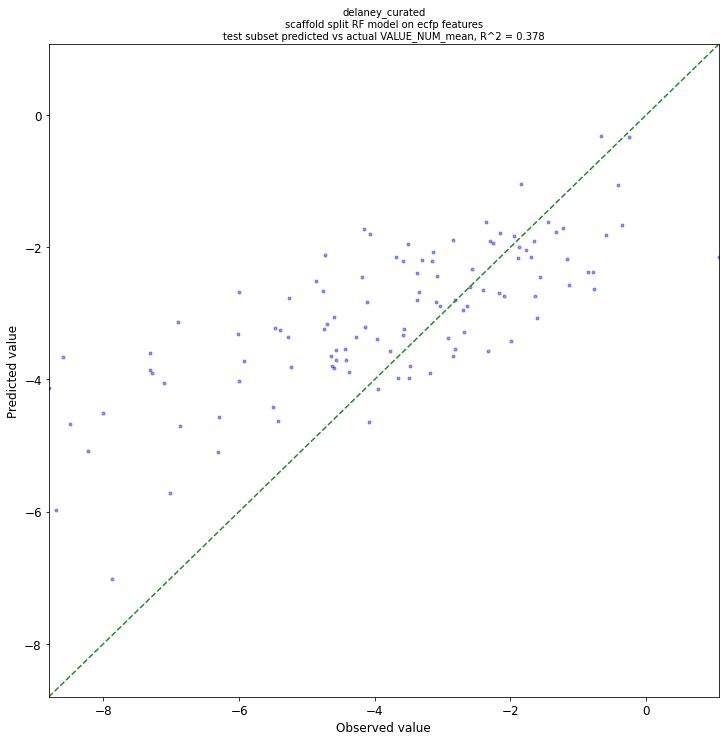

In [26]:
params={"datastore": "False",
        "save_results": "False",
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_cols,
        "featurizer": featurizer,
        "model_type": model_type,
        "result_dir": working_dir,
        "dataset_key": curated_file}

pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
MP.train_model()
pp.plot_pred_vs_actual(MP)